### Loading necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPool2D,Conv2D,Dense,Flatten,Input,UpSampling2D,BatchNormalization,Activation,Reshape
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam

## CNN

### Adding Noise

In [ ]:
add_noise = True
noise_factor = 0.2
(xtrain,_),(xtest,_) = cifar10.load_data()

xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

xtrain_noisy = xtrain.copy()
xtest_noisy = xtest.copy()

if add_noise:
  xtrain_noisy = xtrain_noisy + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=xtrain.shape)
  xtest_noisy = xtest_noisy + noise_factor*np.random.normal(loc=0.0,scale=1.0,size = xtest.shape)

  xtrain_noisy = np.clip(xtrain_noisy,0.0,1.0)
  xtest_noisy = np.clip(xtest_noisy,0.0,1.0)


### Model Building

In [ ]:
input_img = Input(shape=(32,32,3))

x = Conv2D(32,(3,3),padding="same")(input_img)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D((2,2),padding="same")(x)

x = Conv2D(64,(3,3),padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D((2,2),padding="same")(x)

x = Conv2D(128,(3,3),padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
encoded = MaxPool2D((2,2),padding="same")(x)


x = Conv2D(128,(3,3),padding="same")(encoded)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(64,(3,3),padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = UpSampling2D((2,2))(x)


x = Conv2D(32,(3,3),padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = UpSampling2D((2,2))(x)


decoded = Conv2D(3,(3,3),activation="sigmoid",padding="same")(x)

autoencoder = Model(input_img,decoded)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 335,747 (1.28 MB)

 Trainable params: 334,851 (1.28 MB)

 Non-trainable params: 896 (3.50 KB)

### Training the model

In [ ]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001),loss="mse")
early = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights = True)

hist = autoencoder.fit(
    x=xtrain_noisy,
    y=xtrain,
    batch_size=100,
    epochs=5,
    shuffle=True,
    callbacks=[early],
    validation_data=(xtest_noisy,xtest))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0174 - val_loss: 0.0124
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0074 - val_loss: 0.0085
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0066 - val_loss: 0.0074


### Model Evaluation

In [ ]:
print(autoencoder.evaluate(xtest_noisy,xtest))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0069
0.006868147291243076


### Visualization

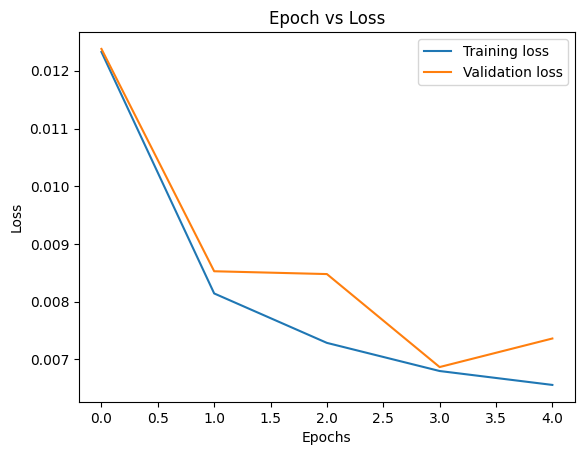

In [ ]:
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Validation loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


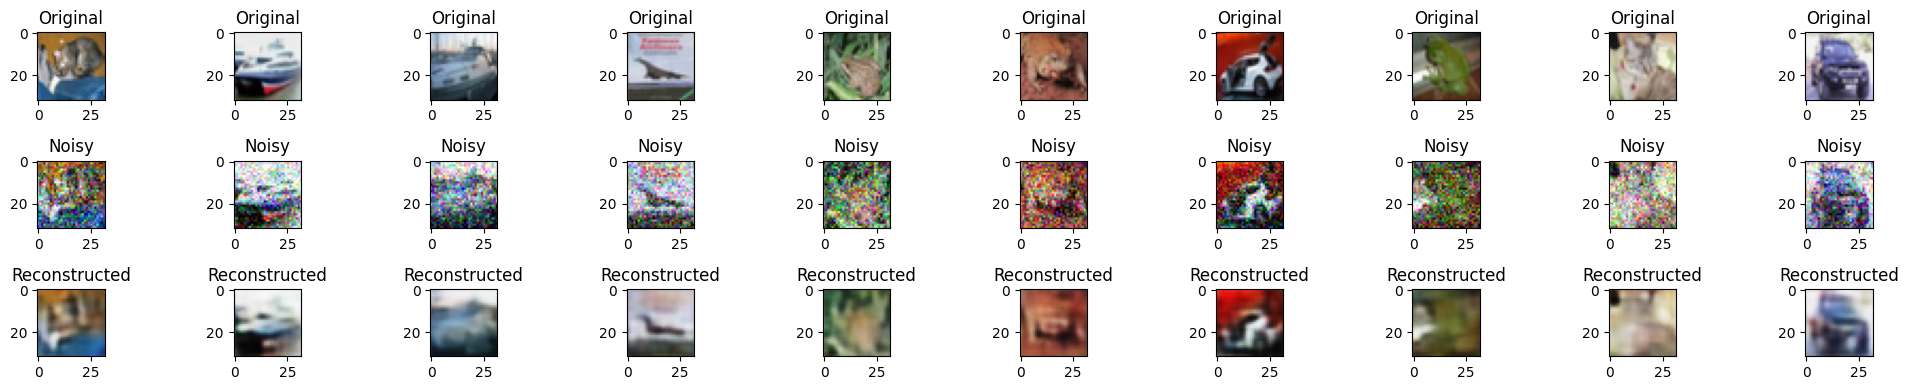

In [ ]:
rec = autoencoder.predict(xtest_noisy[:10])

plt.figure(figsize=(20,4))
n=10
for i in range(10):
  ax = plt.subplot(3,n,i+1)
  plt.imshow(xtest[i])
  plt.title("Original")


  ax = plt.subplot(3,n,n+i+1)
  plt.imshow(xtest_noisy[i])
  plt.title("Noisy")


  ax = plt.subplot(3,n,2*n+i+1)
  plt.imshow(rec[i])
  plt.title("Reconstructed")


plt.tight_layout()
plt.show()


## MLP

## Building Model

In [ ]:
i_dim = np.prod((32,32,3))
enc_dim = 256


input = Input(shape=(32,32,3))
flat_image = Flatten()(input)

encoded = Dense(512,activation='relu')(flat_image)
encoded = Dense(enc_dim,activation='relu')(encoded)


decoded = Dense(512,activation="relu")(encoded)
decoded = Dense(i_dim,activation="sigmoid")(decoded)

output = Reshape((32,32,3))(decoded)

autoencoder = Model(input,output)
autoencoder.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3072)           │     1,575,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,412,224 (13.02 MB)

 Trainable params: 3,412,224 (13.02 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [ ]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001),loss="mse")
early = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights = True)

hist = autoencoder.fit(
    x=xtrain_noisy,
    y=xtrain,
    batch_size=100,
    epochs=5,
    shuffle=True,
    callbacks=[early],
    validation_data=(xtest_noisy,xtest))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0379 - val_loss: 0.0173
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0165 - val_loss: 0.0143
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0118 - val_loss: 0.0114


### Visualization

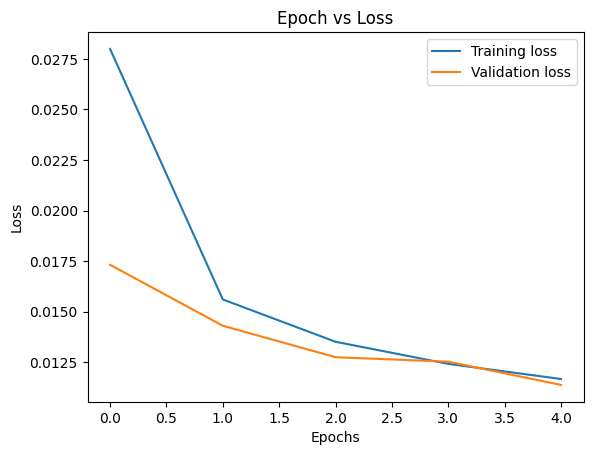

In [ ]:
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Validation loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


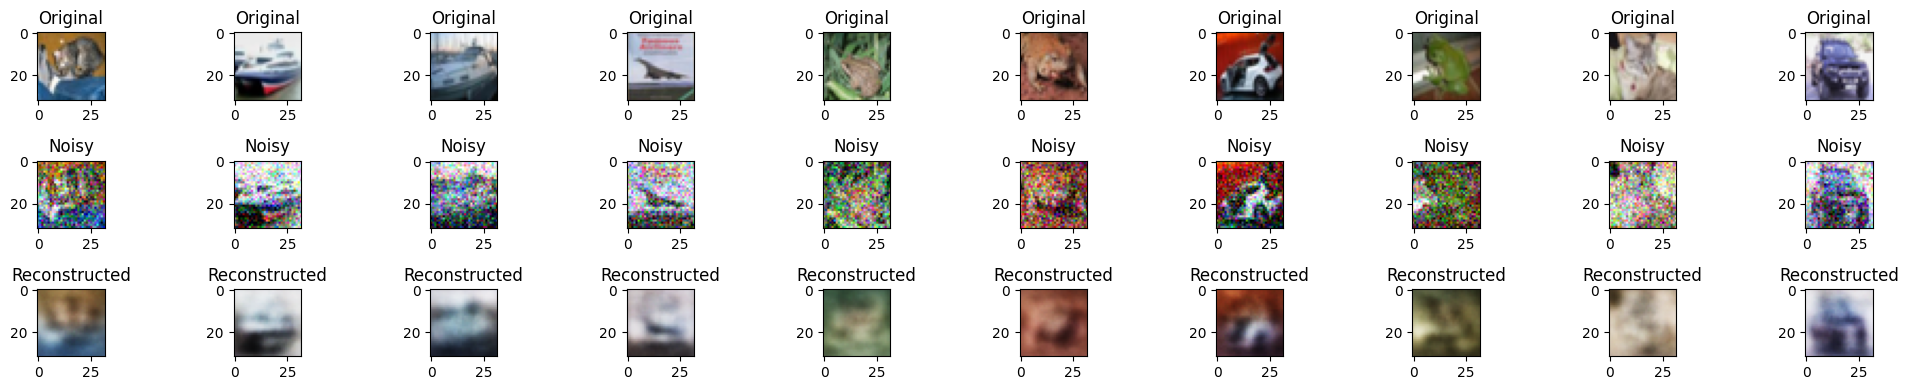

In [ ]:
rec = autoencoder.predict(xtest_noisy[:10])

n = 10

plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(3,n,i+1)
  plt.imshow(xtest[i])
  plt.title("Original")

  ax = plt.subplot(3,n,n+i+1)
  plt.imshow(xtest_noisy[i])
  plt.title("Noisy")

  ax = plt.subplot(3,n,2*n+i+1)
  plt.imshow(rec[i])
  plt.title("Reconstructed")


plt.tight_layout()
plt.show()